# IEEE-CIS Fraud Detection

- [x] library import
- [x] EDA (understand every column)
- [x] dataset finding
- [x] Feature engineering
- [x] data cleaning
- [x] missing value
- [x] outlier
- [x] balanced data
- [x] PCA
- [x] model
- [x] performence metrix
- [x] hyperparameter tunning
- [x] best model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import seaborn as sns
%matplotlib inline

from scipy import stats
#garbage collector
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

**Transaction Table**

 - **TransactionDT:** timedelta from a given reference datetime (not an actual timestamp)
 - **TransactionAMT:** transaction payment amount in USD
 - **ProductCD:** product code, the product for each transaction
 - **card1 -** card6: payment card information, such as card type, card category, issue bank, country, etc.
 - **addr:** address
 - **dist:** distance
 - **P_ and (R__) emaildomain:** purchaser and recipient email domain
 - **C1-C14:** counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
 - **D1-D15:** timedelta, such as days between previous transaction, etc.
 - **M1-M9:** match, such as names on card and address, etc.
 - **Vxxx:** Vesta engineered rich features, including ranking, counting, and other entity relations.
 
 
 **Categorical Features:**
 - ProductCD
 - card1 - card6
 - addr1, addr2
 - P_emaildomain
 - R_emaildomain
 - M1 - M9


**Transaction Table**

***

“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

 - **TransactionDT:** timedelta from a given reference datetime (not an actual timestamp)
     - “TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

***

 - **TransactionAMT:** transaction payment amount in USD
     - “Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”
***

 - **ProductCD:** product code, the product for each transaction
     - “Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”
W (wire transfer), C (credit card), H (debit card), S (store merchandise), and R (recurring payments)

***
 - **card1 - card6:** payment card information, such as card type, card category, issue bank, country, etc.

***

 - **addr: **address
     - “both addresses are for purchaser
     - addr1 as billing region
     - addr2 as billing country”

***

 - ** dist:** distance
     - "distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

***

 - **P_ and (R__) emaildomain:** purchaser and recipient email domain
     - “ certain transactions don't need recipient, so R_emaildomain is null.”

***

 - **C1-C14:** counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
     - “Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”

***

 - **D1-D15:** timedelta, such as days between previous transaction, etc.

***

 - **M1-M9:** match, such as names on card and address, etc.

***

 - **Vxxx:** Vesta engineered rich features, including ranking, counting, and other entity relations.
     - “For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

***

**Identity Table ***

 - Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
 - They're collected by Vesta’s fraud protection system and digital security partners.
 - (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

**Categorical Features:**

 - DeviceType
 - DeviceInfo
 - id_12 - id_38

In [ ]:
# to view all the columns

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
transaction=pd.read_csv(r"D:\DATASET\IEEE-CIS Fraud Detection\train_transaction.csv")

In [9]:
identity=pd.read_csv(r"D:\DATASET\IEEE-CIS Fraud Detection\train_identity.csv")

In [10]:
# Merge the two datasets on 'TransactionID' column
df = pd.merge(transaction, identity, on='TransactionID', how='left')

In [11]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [7]:
df.shape

(590540, 434)

In [8]:
#TransactionID  -  this column is unqiue for every row. 
# TransactionDT - timedelta from a given reference datetime (not an actual timestamp) -- this column is datetime refrence
# every value of TransactionDT column - indicate a particular time when we convert this into date time format

# TransactionID column are not play critical role in model
# latter we drop TransactionID columns

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 403 numerical features : ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94

#### For every feature,  it shows information like- 
 - 1. dtypes
 - 2. missing no.
 - 3. missing percentage
 - 4. unique value

In [10]:
def table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['feature_name'] = summary['index']
    summary = summary[['feature_name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Missing %'] = (df.isnull().sum().values)/df.shape[0] * 100
    summary['Uniques'] = df.nunique().values
    summary=summary.set_index('feature_name')
    return summary

In [11]:
table(df)[:5]

Dataset Shape: (590540, 434)


,dtypes,Missing,Missing %,Uniques
feature_name,,,,
TransactionID,int64,0,0.0,590540
isFraud,int64,0,0.0,2
TransactionDT,int64,0,0.0,573349
TransactionAmt,float64,0,0.0,20902
ProductCD,object,0,0.0,5


### checking missing value in every column

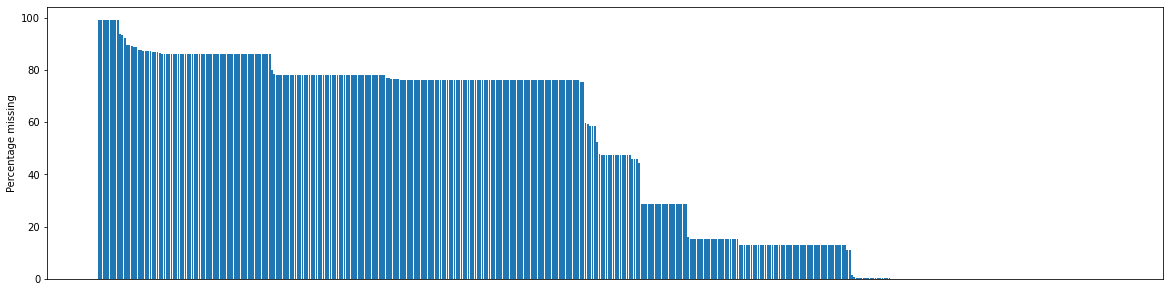

In [13]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(20,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

#### Finding:- there are many number of column , those have missing value more than 60%

In [15]:
def num(a):
    dropcols = missing[missing[0]>a].shape[0]
    print(missing[missing[0]>a])
    print(f"No. of missing column which has more than {a} % missing data : {dropcols}")
    
num(80)

               0
id_24  99.196159
id_25  99.130965
id_07  99.127070
id_08  99.127070
id_21  99.126393
...          ...
V327   86.054967
V326   86.054967
V322   86.054967
V323   86.054967
V331   86.054967

[74 rows x 1 columns]
No. of missing column which has more than 80 % missing data : 74


In [ ]:
# more than 74 column contain 80 % missing value

In [16]:
for feature in df.columns:
   
    print(f'column name : {feature} | no. of unique value is :  {df[feature].unique().shape[0]} | null count is : {df[feature].isnull().sum()}')
    print('*'*100)
    print()


column name : TransactionID | no. of unique value is :  590540 | null count is : 0
****************************************************************************************************

column name : isFraud | no. of unique value is :  2 | null count is : 0
****************************************************************************************************

column name : TransactionDT | no. of unique value is :  573349 | null count is : 0
****************************************************************************************************

column name : TransactionAmt | no. of unique value is :  20902 | null count is : 0
****************************************************************************************************

column name : ProductCD | no. of unique value is :  5 | null count is : 0
****************************************************************************************************

column name : card1 | no. of unique value is :  13553 | null count is : 0
*********************

column name : M3 | no. of unique value is :  3 | null count is : 271100
****************************************************************************************************

column name : M4 | no. of unique value is :  4 | null count is : 281444
****************************************************************************************************

column name : M5 | no. of unique value is :  3 | null count is : 350482
****************************************************************************************************

column name : M6 | no. of unique value is :  3 | null count is : 169360
****************************************************************************************************

column name : M7 | no. of unique value is :  3 | null count is : 346265
****************************************************************************************************

column name : M8 | no. of unique value is :  3 | null count is : 346252
**********************************************************

column name : V49 | no. of unique value is :  7 | null count is : 168969
****************************************************************************************************

column name : V50 | no. of unique value is :  7 | null count is : 168969
****************************************************************************************************

column name : V51 | no. of unique value is :  8 | null count is : 168969
****************************************************************************************************

column name : V52 | no. of unique value is :  10 | null count is : 168969
****************************************************************************************************

column name : V53 | no. of unique value is :  7 | null count is : 77096
****************************************************************************************************

column name : V54 | no. of unique value is :  8 | null count is : 77096
*****************************************************

column name : V103 | no. of unique value is :  929 | null count is : 314
****************************************************************************************************

column name : V104 | no. of unique value is :  17 | null count is : 314
****************************************************************************************************

column name : V105 | no. of unique value is :  101 | null count is : 314
****************************************************************************************************

column name : V106 | no. of unique value is :  57 | null count is : 314
****************************************************************************************************

column name : V107 | no. of unique value is :  3 | null count is : 314
****************************************************************************************************

column name : V108 | no. of unique value is :  9 | null count is : 314
**********************************************************

column name : V160 | no. of unique value is :  9622 | null count is : 508589
****************************************************************************************************

column name : V161 | no. of unique value is :  80 | null count is : 508595
****************************************************************************************************

column name : V162 | no. of unique value is :  186 | null count is : 508595
****************************************************************************************************

column name : V163 | no. of unique value is :  107 | null count is : 508595
****************************************************************************************************

column name : V164 | no. of unique value is :  1979 | null count is : 508589
****************************************************************************************************

column name : V165 | no. of unique value is :  2548 | null count is : 508589
********************************

column name : V213 | no. of unique value is :  8318 | null count is : 450909
****************************************************************************************************

column name : V214 | no. of unique value is :  2283 | null count is : 450909
****************************************************************************************************

column name : V215 | no. of unique value is :  2748 | null count is : 450909
****************************************************************************************************

column name : V216 | no. of unique value is :  2533 | null count is : 450909
****************************************************************************************************

column name : V217 | no. of unique value is :  305 | null count is : 460110
****************************************************************************************************

column name : V218 | no. of unique value is :  402 | null count is : 460110
******************************

column name : V262 | no. of unique value is :  22 | null count is : 460110
****************************************************************************************************

column name : V263 | no. of unique value is :  10423 | null count is : 460110
****************************************************************************************************

column name : V264 | no. of unique value is :  13359 | null count is : 460110
****************************************************************************************************

column name : V265 | no. of unique value is :  11758 | null count is : 460110
****************************************************************************************************

column name : V266 | no. of unique value is :  2179 | null count is : 460110
****************************************************************************************************

column name : V267 | no. of unique value is :  3617 | null count is : 460110
***************************

column name : V309 | no. of unique value is :  4237 | null count is : 12
****************************************************************************************************

column name : V310 | no. of unique value is :  19137 | null count is : 12
****************************************************************************************************

column name : V311 | no. of unique value is :  3099 | null count is : 12
****************************************************************************************************

column name : V312 | no. of unique value is :  8069 | null count is : 12
****************************************************************************************************

column name : V313 | no. of unique value is :  5530 | null count is : 1269
****************************************************************************************************

column name : V314 | no. of unique value is :  11378 | null count is : 1269
**********************************************

column name : id_27 | no. of unique value is :  3 | null count is : 585371
****************************************************************************************************

column name : id_28 | no. of unique value is :  3 | null count is : 449562
****************************************************************************************************

column name : id_29 | no. of unique value is :  3 | null count is : 449562
****************************************************************************************************

column name : id_30 | no. of unique value is :  76 | null count is : 512975
****************************************************************************************************

column name : id_31 | no. of unique value is :  131 | null count is : 450258
****************************************************************************************************

column name : id_32 | no. of unique value is :  5 | null count is : 512954
*************************************

In [17]:
# duplicates

In [18]:
df.duplicated().sum()

0

### dataset contain no duplicated row

# target column

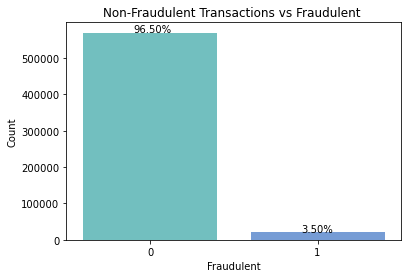

In [19]:

# Create countplot on the 'isFraud' column
ax = sns.countplot(x='isFraud', data=df,palette="winter_r",alpha=.6)

# Set plot title and axis labels
plt.title('Non-Fraudulent Transactions vs Fraudulent ')
plt.xlabel('Fraudulent')
plt.ylabel('Count')

# Add percentage values to the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))

# Show the plot
plt.show()

A value of 0 indicates that the transaction is not fraudulent,
while a value of 1 indicates that the transaction is fraudulent.

**Report**
- The target classes are highly imbalanced
- isFraud imbalance is a scenario that arises when we have unequal distribution of class in a dataset 
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.
 

# TransactionAmt

In [20]:
print(pd.concat([df[df['isFraud'] == 1]['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(), 
                 df[df['isFraud'] == 0]['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index()],
                axis=1, keys=['Fraud', "No Fraud"]))

  Fraud                No Fraud               
  index TransactionAmt    index TransactionAmt
0  0.01        6.74096     0.01        9.51288
1  0.10       18.93600     0.10       26.31000
2  0.25       35.04400     0.25       43.97000
3  0.50       75.00000     0.50       68.50000
4  0.75      161.00000     0.75      120.00000
5  0.90      335.00000     0.90      267.11200
6  0.99      994.00000     0.99     1104.00000


In [21]:
# total % of transaction that is fraud and not fraud

df.groupby(['isFraud'])['TransactionAmt'].sum()/df['TransactionAmt'].sum() *100

isFraud
0    96.132574
1     3.867426
Name: TransactionAmt, dtype: float64

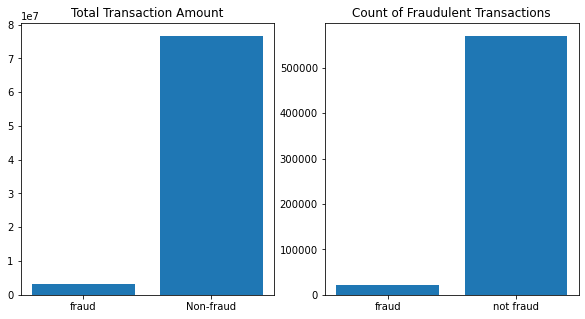

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fraud_amt = df[df['isFraud'] == 1]['TransactionAmt'].sum()
non_fraud_amt = df[df['isFraud'] == 0]['TransactionAmt'].sum()

fraud_count = df['isFraud'].value_counts()[1]
non_fraud_count = df['isFraud'].value_counts()[0]

ax[0].bar(['fraud', 'Non-fraud'], [fraud_amt, non_fraud_amt])
ax[0].set_title('Total Transaction Amount')
#ax[0].show()

ax[1].bar(['fraud', 'not fraud'], [fraud_count, non_fraud_count])
ax[1].set_title('Count of Fraudulent Transactions')
#ax[1].show()
plt.show()

# product code

 - **ProductCD:** product code, the product for each transaction “Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart).
 - It could be any kind of service.”**W (wire transfer), C (credit card), H (debit card), S (store merchandise), and R (recurring payments)**

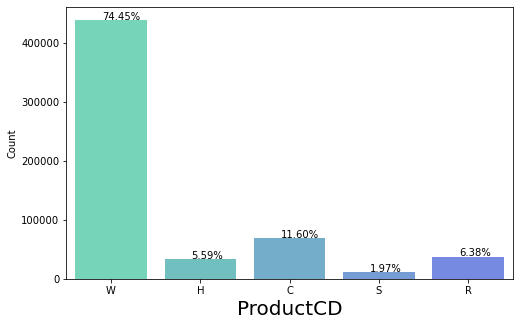

In [23]:
plt.figure(figsize=(8,5))

# Create countplot on the 'ProductCD' column
ax = sns.countplot(x='ProductCD', data=df,palette="winter_r",alpha=.6)

# Set plot title and axis labels

plt.xlabel('ProductCD',fontsize=20)
plt.xticks(rotation='horizontal')
plt.ylabel('Count')

# Add percentage values to the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))

# Show the plot
plt.show()

####  W (wire transfer) 
     - this has max count in this productCD column
#### C (credit card)and  R (recurring payments) are the most frequent values after wire transfer.

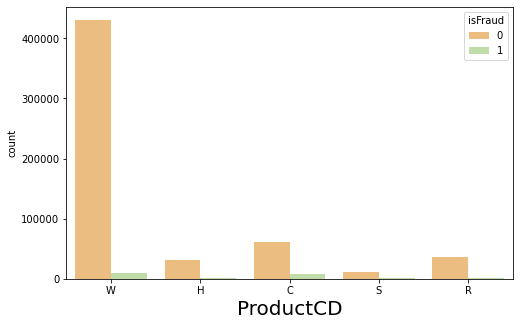

In [25]:

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='ProductCD',palette = "Spectral",hue='isFraud')
plt.xlabel('ProductCD',fontsize=20)
plt.xticks(rotation='horizontal')
plt.show()

### Through C(credit card) there are large no. of Fraud in comparison to others

Text(0, 0.5, 'Transaction Values')

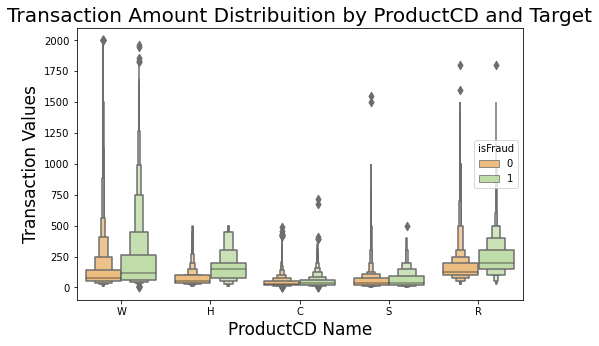

In [27]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', data=df[df['TransactionAmt'] <= 2000],palette="Spectral" )
plt.title("Transaction Amount Distribuition by ProductCD and Target", fontsize=20)
plt.xlabel("ProductCD Name", fontsize=17)
plt.ylabel("Transaction Values", fontsize=17)

# Card Features

- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.


**card1:** This column represents the issuer of the card, identified by a numeric code.

**card2:** This column represents the card network, identified by a numeric code. The network codes are shared by multiple issuers.

**card3:** This column represents the country where the card was issued, identified by a numeric code.

**card4:** This column represents the card network, identified by a categorical string value. Possible values include "visa", "mastercard", "american express", and "discover".

**card5:** This column represents the bank that issued the card, identified by a numeric code.

**card6:** This column represents the type of card used in the transaction. Possible values include "credit", "debit", "charge card", "debit or credit", and "unknown".

Each of these columns provides additional information about the card used in the transaction, which may be useful in predicting fraudulent activity.

In [28]:
table(df)[5:11].T

Dataset Shape: (590540, 434)


feature_name,card1,card2,card3,card4,card5,card6
dtypes,int64,float64,float64,object,float64,object
Missing,0,8933,1565,1577,4259,1571
Missing %,0.0,1.512683,0.265012,0.267044,0.721204,0.266028
Uniques,13553,500,114,4,119,4


In [29]:
# it represent missing value, unique value and the data type od card1 to card6

# card4 and card6 is object type
#card1,card2,card3,card5 -- are integer and float type

# card 2 to card 6 - there are missing value . we will deal it with latter

In [30]:
df['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [31]:
df['card6'].unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [32]:
df['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [33]:

df['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [34]:
# card 4

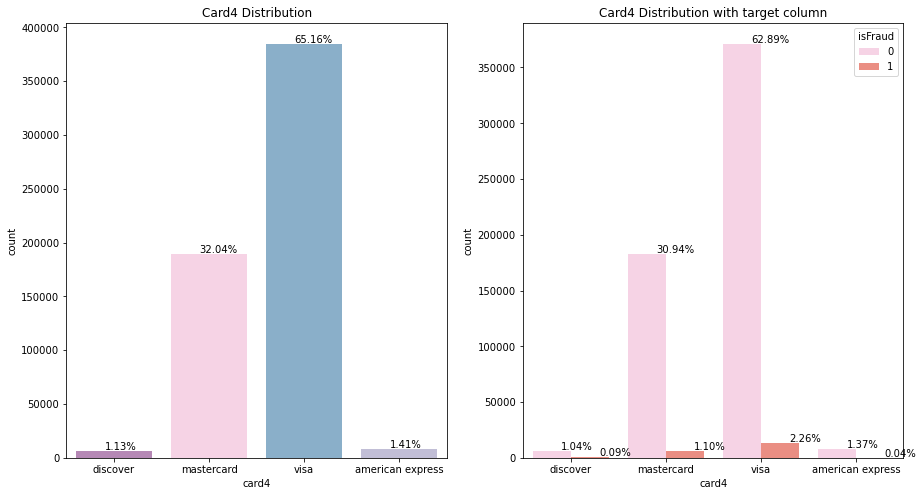

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x='card4', data=df, ax=ax[0],palette = "Set3_r")
ax[0].set_title('Card4 Distribution')
total = float(len(df))
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))

sns.countplot(x='card4', data=df, hue='isFraud', ax=ax[1],palette = "Set3_r")
ax[1].set_title('Card4 Distribution with target column')
total = float(len(df))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))
    


### most of the person has visa card - 65.16%
#### no. of fraud with Visa card are higher than other card - 2.26%
#### We can see that 97% of our data are in Mastercard(32%) and Visa(65%);

In [37]:
#card 6

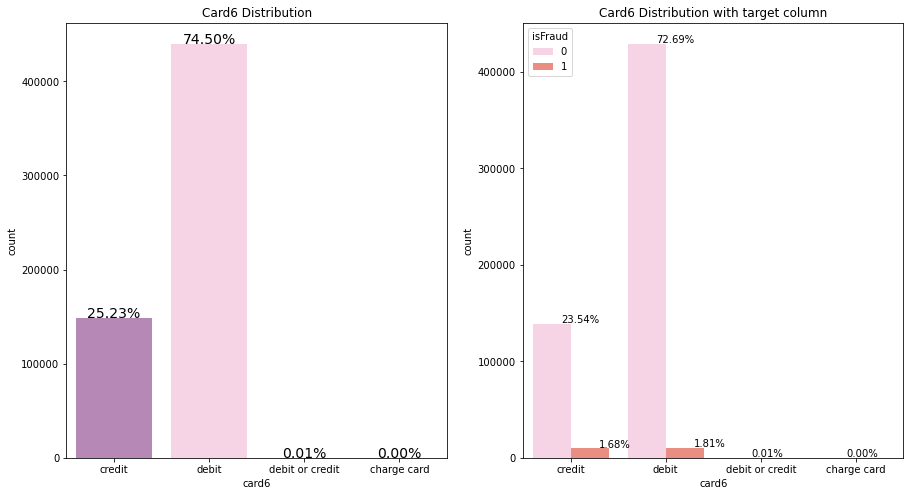

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x='card6', data=df, ax=ax[0],palette = "Set3_r")
ax[0].set_title('Card6 Distribution')
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

sns.countplot(x='card6', data=df, hue='isFraud', ax=ax[1],palette = "Set3_r")
ax[1].set_title('Card6 Distribution with target column')

total = float(len(df))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))

### no. of debit card is higher than other card

### In comparison to debit card there are more no. fraud occur with credit card

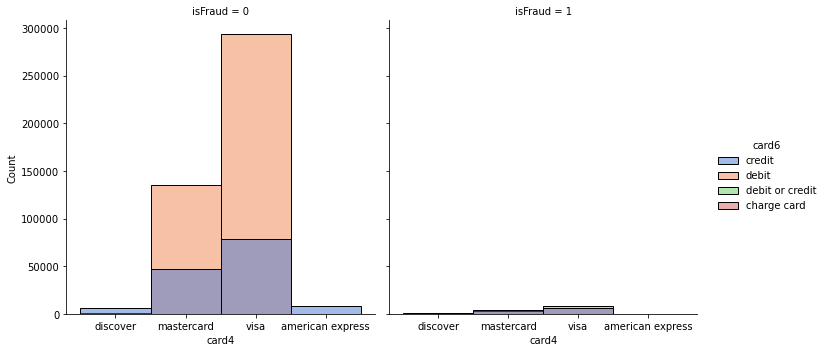

In [39]:
sns.displot(x='card4', data=df,palette = "muted",hue='card6',col='isFraud')

#### more no. of fraud occur with visa card and mostly visa credit card

#### then on 2nd place - fraud occur with mastercard credit card

In [40]:
#card 1 :- This column represents the issuer of the card, identified by a numeric code

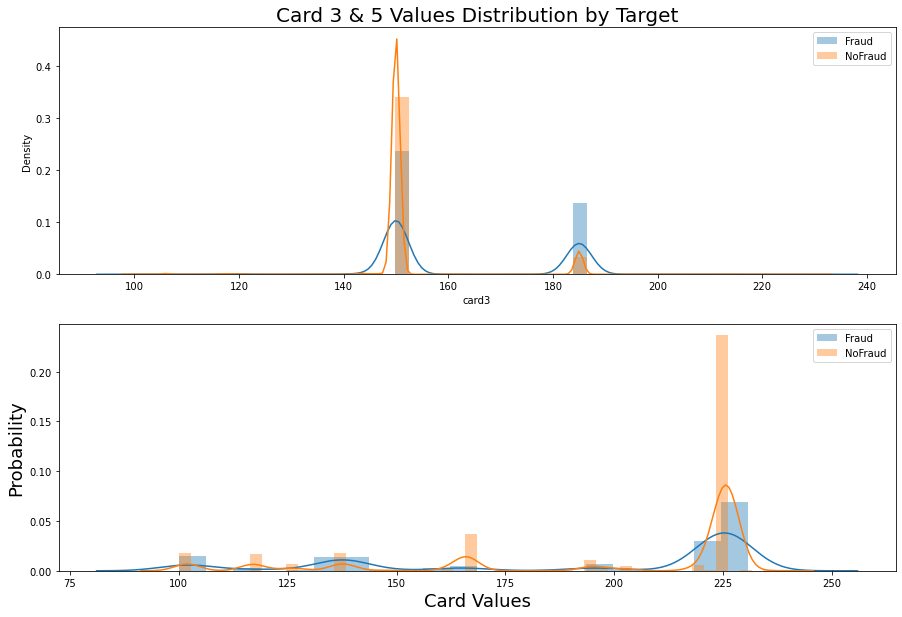

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))


sns.distplot(df[df['isFraud'] == 1]['card3'], label='Fraud', ax=ax[0])
sns.distplot(df[df['isFraud'] == 0]['card3'], label='NoFraud', ax=ax[0])
ax[0].legend()

sns.distplot(df[df['isFraud'] == 1]['card5'], label='Fraud', ax=ax[1])
sns.distplot(df[df['isFraud'] == 0]['card5'], label='NoFraud', ax=ax[1])
ax[1].legend()

ax[0].set_title("Card 3 & 5 Values Distribution by Target", fontsize=20)
ax[1].set_xlabel("Card Values", fontsize=18)
ax[1].set_ylabel("Probability", fontsize=18)
plt.show()

### card3: This column represents the country where the card was issued, identified by a numeric code.
    - In card3 column, most no. of fraud occur near to 180(represent a country where card is issued)

### card5: This column represents the bank that issued the card, identified by a numeric code.
     - fraud occur at 225(no. represent a bank that issued that card)
     - this no. might be related to a bank which issue more no. of mastercard credit card and visa credit card

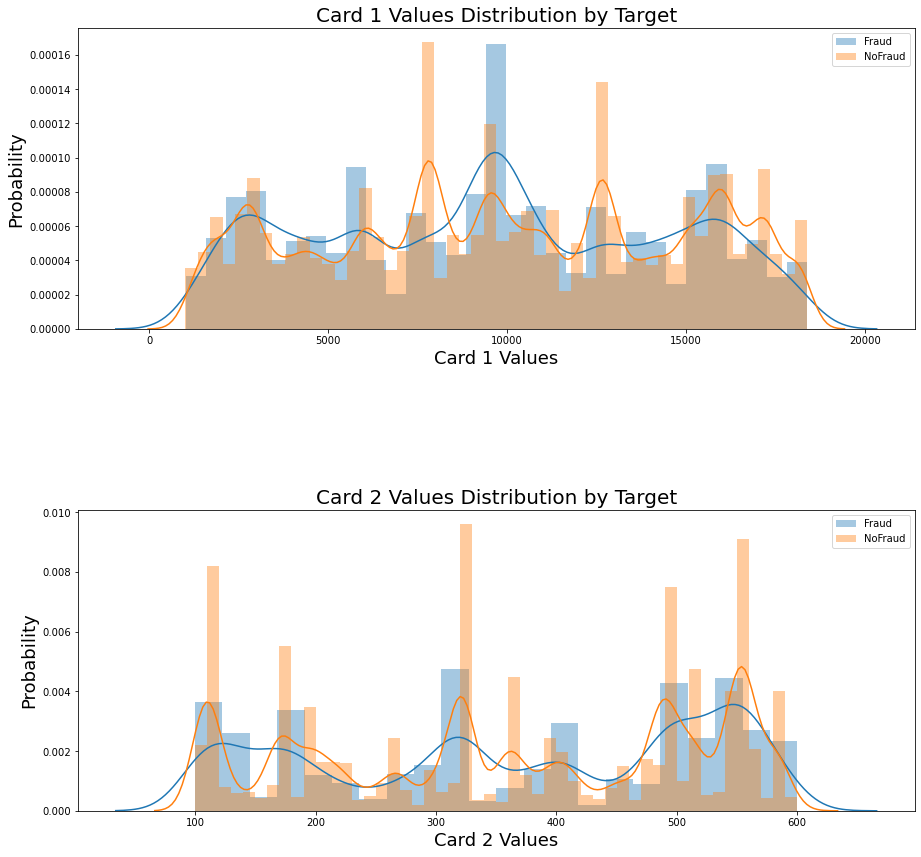

In [42]:

fig, ax = plt.subplots(2, 1, figsize=(15, 15))


plt.subplot(211)

sns.distplot(df[df['isFraud'] == 1]['card1'], label='Fraud')
sns.distplot(df[df['isFraud'] == 0]['card1'], label='NoFraud')
plt.legend()

plt.title("Card 1 Values Distribution by Target", fontsize=20)
plt.xlabel("Card 1 Values", fontsize=18)
plt.ylabel("Probability", fontsize=18)


plt.subplot(212)

sns.distplot(df[df['isFraud'] == 1]['card2'], label='Fraud')
sns.distplot(df[df['isFraud'] == 0]['card2'], label='NoFraud')
plt.legend()

plt.title("Card 2 Values Distribution by Target", fontsize=20)
plt.xlabel("Card 2 Values", fontsize=18)
plt.ylabel("Probability", fontsize=18)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


### card 3

 - Card 3 refers to the code of the country where the card was issued. It is a three-digit number that is a part of the credit card number and indicates the country of origin of the card. The purpose of the Card 3 value is to enable merchants to determine if the credit card transaction is local or international, as it helps to identify the country where the card was issued.


Text(0, 0.5, 'Count')

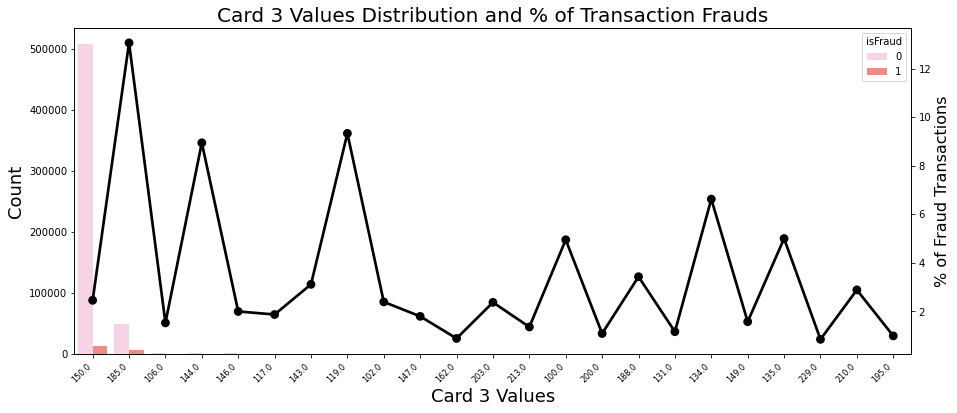

In [43]:
tmp = pd.crosstab(df['card3'], df['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)


grouped_card3 =df['card3'].value_counts()[df['card3'].value_counts()>100].index


plt.figure(figsize=(15, 6))
g = sns.countplot(x='card3', data=df[df['card3'].isin(grouped_card3)], order=grouped_card3,hue='isFraud',palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
g2 = g.twinx()
gg = sns.pointplot(x='card3', y='Fraud', data=tmp[tmp['card3'].isin(grouped_card3)],
                   color='black', order=grouped_card3)
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("Card 3 Values Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("Card 3 Values", fontsize=18)
g.set_ylabel("Count", fontsize=18)

### card 5

 - Different banks or financial institutions issue credit cards with different BINs. Therefore, card5 can be used as an identifier for different card issuers or types of cards. 

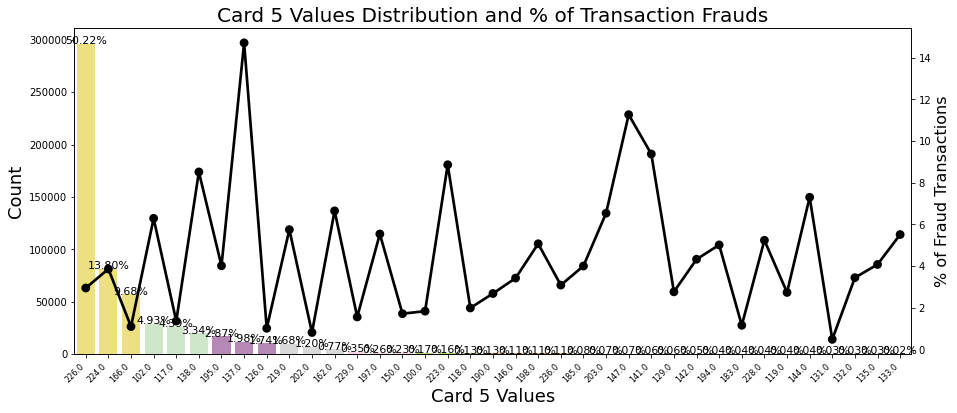

In [44]:
tmp = pd.crosstab(df['card5'], df['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

# Group card5 values by frequency
grouped_card5 = df['card5'].value_counts()
grouped_card5 = grouped_card5[grouped_card5 > 100]  # Filter out low frequency values
grouped_card5 = grouped_card5.index
#grouped_card5 =df['card5'].value_counts()[df['card5'].value_counts()>100].index

plt.figure(figsize=(15, 6))
g = sns.countplot(x='card5', data=df[df['card5'].isin(grouped_card5)], order=grouped_card5,palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
g2 = g.twinx()
gg = sns.pointplot(x='card5', y='Fraud', data=tmp[tmp['card5'].isin(grouped_card5)],
                   color='black', order=grouped_card5)
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("Card 5 Values Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("Card 5 Values", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    

#### In card5 the most frequent values are 226, 224, 166 that represents 73% of data. Also is posible to see high % of frauds in 137, 147, 141 that has few entries for values.

# Addr1 and Addr2

 - addr1 refers to a feature or column in a dataset that contains information about the billing address associated with a credit card transaction. Specifically, addr1 represents the first line of the billing address, which typically includes the street number, street name, and sometimes apartment or suite number.

In [45]:
table(df)['addr1':'addr2'].T

Dataset Shape: (590540, 434)


feature_name,addr1,addr2
dtypes,float64,float64
Missing,65706,65706
Missing %,11.126427,11.126427
Uniques,332,74


In [46]:



# there 332 unique value in addr1,  but with value count it is clearly visible that lot of value are under 5000
# so that those are value which are less than 5000 are consider as 'others'  , it will help in understanding an plotting data

In [47]:
# Replace rare values in addr1 column with "Others"
addr1_counts = df.addr1.value_counts()
rare_addr1 = addr1_counts[addr1_counts <= 5000].index
df.loc[df.addr1.isin(rare_addr1), 'addr1'] = "Others"

# Replace rare values in addr2 column with "Others"
addr2_counts = df.addr2.value_counts()
rare_addr2 = addr2_counts[addr2_counts <= 50].index
df.loc[df.addr2.isin(rare_addr2), 'addr2'] = "Others"

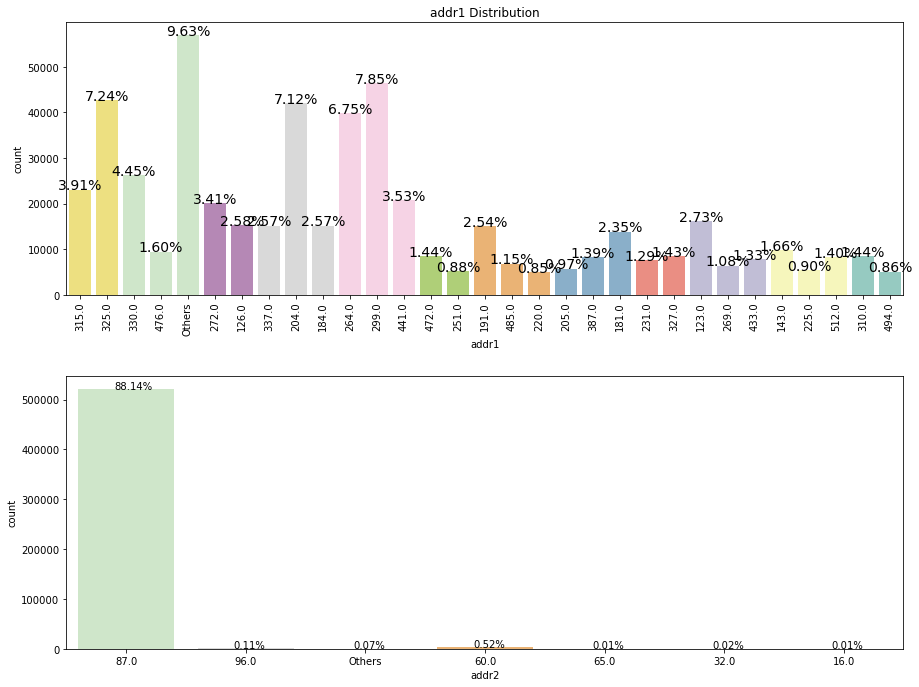

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
sns.countplot(x='addr1', data=df, ax=ax[0],palette = "Set3_r")
ax[0].set_title('addr1 Distribution')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

sns.countplot(x='addr2', data=df,  ax=ax[1],palette = "Set3_r")
#ax[1].set_title('Card6 Distribution with target column')

total = float(len(df))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{(height / total) * 100:.2f}%', (p.get_x() + 0.3, height + 1000))
    
plt.subplots_adjust(hspace = 0.3, top = 0.85)

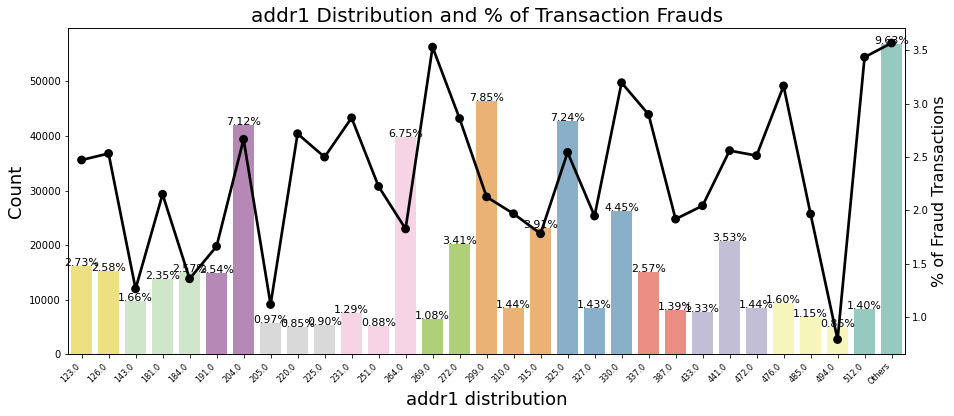

In [50]:
tmp = (pd.crosstab(df['addr1'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='addr1', data=df, order=list(tmp['addr1'].values), palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='addr1', y='Fraud', data=tmp,color='black', order=list(tmp['addr1'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("addr1 Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("addr1 distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 

#### addr1 (information about the billing address associated with a credit card transaction. ) most of the fraud transaction occur at 269 and lowest fraud transaction occur at 494
     - some of the billing area are more prone to fraud transaction


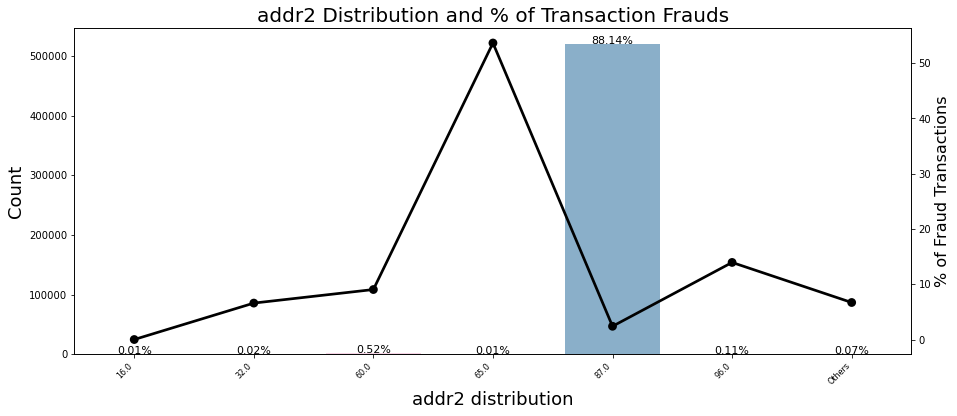

In [51]:
tmp = (pd.crosstab(df['addr2'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='addr2', data=df, order=list(tmp['addr2'].values), palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='addr2', y='Fraud', data=tmp,color='black', order=list(tmp['addr2'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("addr2 Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("addr2 distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 

# M1 to M9 feature

The values in these columns are typically binary, with a value of 'T' indicating a match and 'F' indicating a mismatch or missing information. Some examples of the personal identifiers used in these columns include:

**M1:** Matched name information
**M2:** Matched address information
**M3:** Matched country code
**M4:** Matched account number (cardholder ID)
**M5:** Matched ZIP code
**M6:** Matched customer phone number
**M7:** Matched email address
**M8:** Matched IP address
**M9:** Matched billing address

In [52]:
table(df)["M1":"M9"].T

Dataset Shape: (590540, 434)


feature_name,M1,M2,M3,M4,M5,M6,M7,M8,M9
dtypes,object,object,object,object,object,object,object,object,object
Missing,271100,271100,271100,281444,350482,169360,346265,346252,346252
Missing %,45.907136,45.907136,45.907136,47.658753,59.349409,28.678836,58.635317,58.633115,58.633115
Uniques,2,2,2,3,2,2,2,2,2


In [53]:
# feature M1 to M9 there are multiple no. of missing value
# filling the nan value with "Missing"

In [54]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    df[col] = df[col].fillna("Missing")

In [55]:
df['M1'].unique()

array(['T', 'Missing', 'F'], dtype=object)

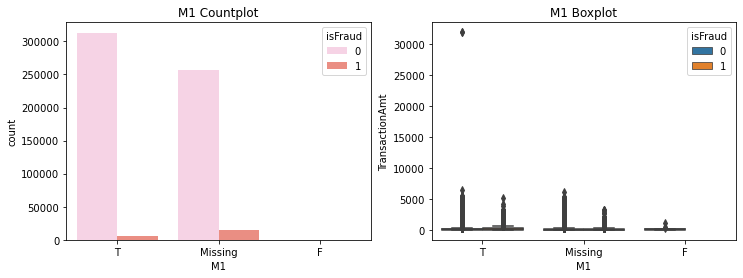

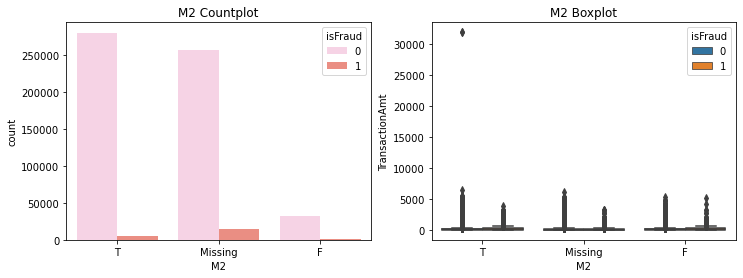

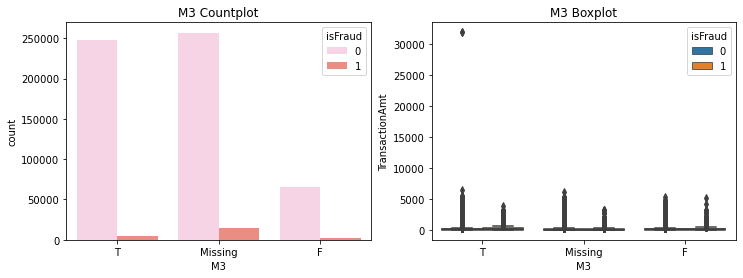

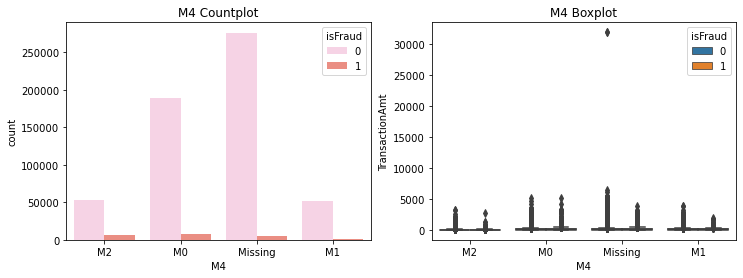

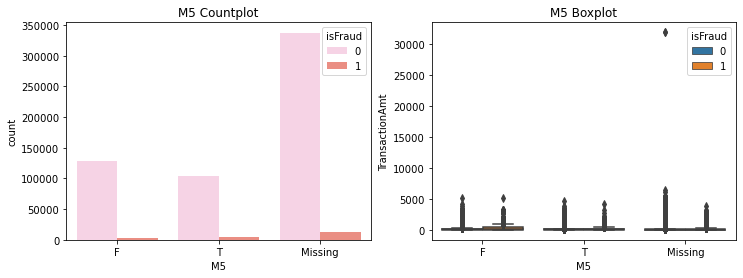

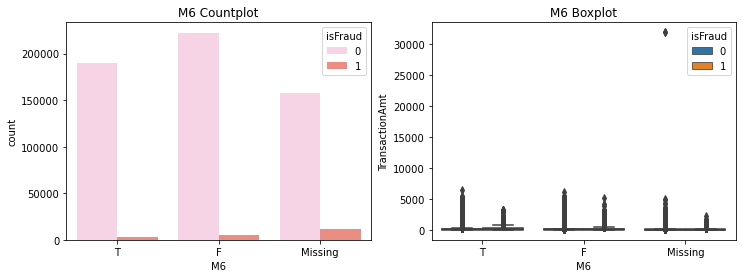

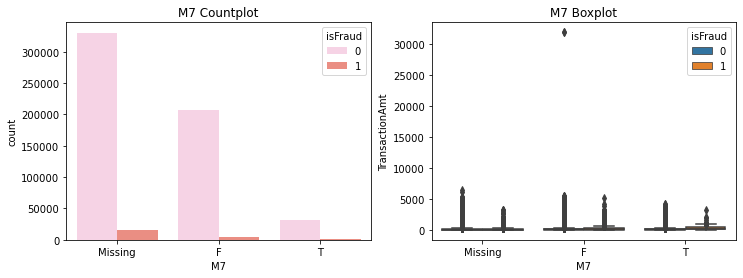

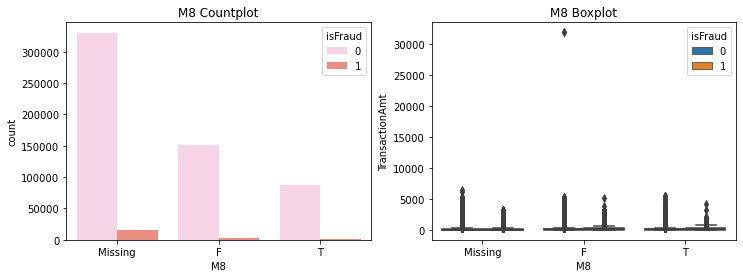

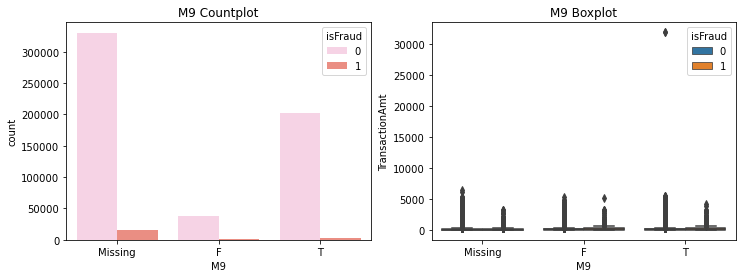

In [56]:
# Plot countplot and boxplot for each column
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    sns.countplot(x=col, data=df, ax=ax[0],palette = "Set3_r",hue='isFraud')
    ax[0].set_title(f'{col} Countplot')
    sns.boxplot(x=col, y='TransactionAmt', data=df, ax=ax[1],hue='isFraud')
    ax[1].set_title(f'{col} Boxplot')
    plt.show()

# 'P_emaildomain' , 'R_emaildomain'

- email addresses, the term "P" in "P_emaildomain" stands for "Purchaser". The column "P_emaildomain" typically represents the email domain of the purchaser

- R_emaildomain is a categorical variable that represents the domain of the recipient email address in an email communication. T

In [57]:
table(df)['P_emaildomain':'R_emaildomain']



Dataset Shape: (590540, 434)


,dtypes,Missing,Missing %,Uniques
feature_name,,,,
P_emaildomain,object,94456,15.994852,59
R_emaildomain,object,453249,76.751617,60


In [58]:
df['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [59]:
df['R_emaildomain'].unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [60]:
df.replace(to_replace=["gmail.com", "gmail"],value="Google",inplace=True)
df.replace(to_replace=['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk','yahoo.co.jp', 'yahoo.de', 'yahoo.fr','yahoo.es'],value='yahoo',inplace=True)
df.replace(to_replace=['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr'],value='microsoft',inplace=True)
df['P_emaildomain'].fillna('Noinf',inplace=True)
df.loc[df.P_emaildomain.isin(df.P_emaildomain
                                         .value_counts()[df.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"

In [61]:
# reveiver emailaddress

df['R_emaildomain'].fillna('Noinf',inplace=True)
df.loc[df.R_emaildomain.isin(df.R_emaildomain.value_counts()[df.R_emaildomain.value_counts() <= 500 ].index), 'R_emaildomain'] = "Others"

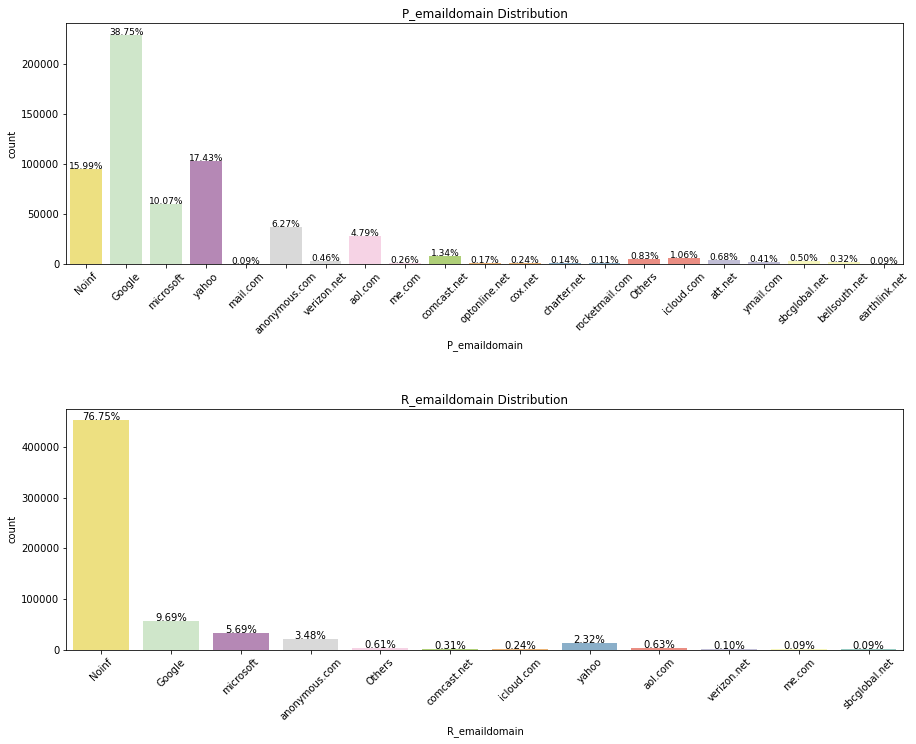

In [62]:
#tmp = (pd.crosstab(df['P_emaildomain'], df['isFraud'], normalize='index') * 100).reset_index().rename(columns={0:'NoFraud', 1:'Fraud'})

#grouped_P_emaildomain =df['P_emaildomain'].value_counts()[df['P_emaildomain'].value_counts()>100].index


fig, ax = plt.subplots(2, 1, figsize=(15, 12))

sns.countplot(x='P_emaildomain', data=df, ax=ax[0],palette = "Set3_r")

ax[0].set_title('P_emaildomain Distribution')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=9) 
    
sns.countplot(x='R_emaildomain', data=df, ax=ax[1],palette = "Set3_r")
ax[1].set_title('R_emaildomain Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=10) 
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)

#### missing value in R_emaildomain  is approx 76%


#### in most of the cases the p_emaildomain is gmail.com or gmail

# feature C1 to C14

'C' refers to the Card features. These are continuous numerical features starting from C1 to C14 that represent various counts of transactional data associated with the payment card provided by the card-issuing banks.

In [64]:
table(df)['C1':'C14'].T

Dataset Shape: (590540, 434)


feature_name,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Missing %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uniques,1657,1216,27,1260,319,1328,1103,1253,205,1231,1476,1199,1597,1108


In [65]:
col=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']


In [66]:

for feature in col:
    print(df[feature].value_counts().head())
    print("*"*30)



1.0    316791
2.0    105071
3.0     51315
4.0     28845
5.0     17922
Name: C1, dtype: int64
******************************
1.0    316261
2.0    103948
3.0     51770
4.0     28251
5.0     16971
Name: C2, dtype: int64
******************************
0.0    588111
1.0      2137
2.0       180
3.0        58
4.0         7
Name: C3, dtype: int64
******************************
0.0    451883
1.0    111817
2.0     12994
3.0      4949
4.0      1902
Name: C4, dtype: int64
******************************
0.0    372435
1.0    122883
2.0     34776
3.0     13189
4.0      6828
Name: C5, dtype: int64
******************************
1.0    341552
2.0     86103
0.0     49066
3.0     35490
4.0     17805
Name: C6, dtype: int64
******************************
0.0    523142
1.0     51966
2.0      7314
3.0      2033
4.0      1109
Name: C7, dtype: int64
******************************
0.0    447667
1.0    104994
2.0     15927
3.0      5493
4.0      2817
Name: C8, dtype: int64
******************************
1.0    2

In [67]:
# in every column there is no missing value
# in every column most of the value are related to 0,1,2,3,4,5,6,7
# but in every colum there are soo many unique value,  bcz the value count of some of the value are very less
# following almost same pattern

In [68]:
df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                      'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [69]:
# 75 percentile  of column from C1 to C14  is 2,3,0  but the max value in very column is very high
# it indicate that there are large no. of outliers

In [70]:
for col in df.columns:
    if col.startswith("C"):
        replace_count = df[col].value_counts()[df[col].value_counts() <= 350].index
        df.loc[df[col].isin(replace_count), col] = "Others"

In [71]:
col=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
for feature in col:
    print(df[feature].value_counts().head(10))

1.0       316791
2.0       105071
3.0        51315
Others     29421
4.0        28845
5.0        17922
6.0        10567
7.0         7263
8.0         5072
9.0         3612
Name: C1, dtype: int64
1.0       316261
2.0       103948
3.0        51770
Others     30673
4.0        28251
5.0        16971
6.0        10682
7.0         7382
8.0         5105
9.0         3750
Name: C2, dtype: int64
0.0       588111
1.0         2137
Others       292
Name: C3, dtype: int64
0.0       451883
1.0       111817
2.0        12994
Others      5175
3.0         4949
4.0         1902
5.0          851
6.0          597
7.0          372
Name: C4, dtype: int64
0.0       372435
1.0       122883
2.0        34776
Others     25249
3.0        13189
4.0         6828
5.0         3763
6.0         2837
7.0         1906
8.0         1443
Name: C5, dtype: int64
1.0       341552
2.0        86103
0.0        49066
3.0        35490
Others     22139
4.0        17805
5.0        10187
6.0         6048
7.0         3934
8.0         3048
N

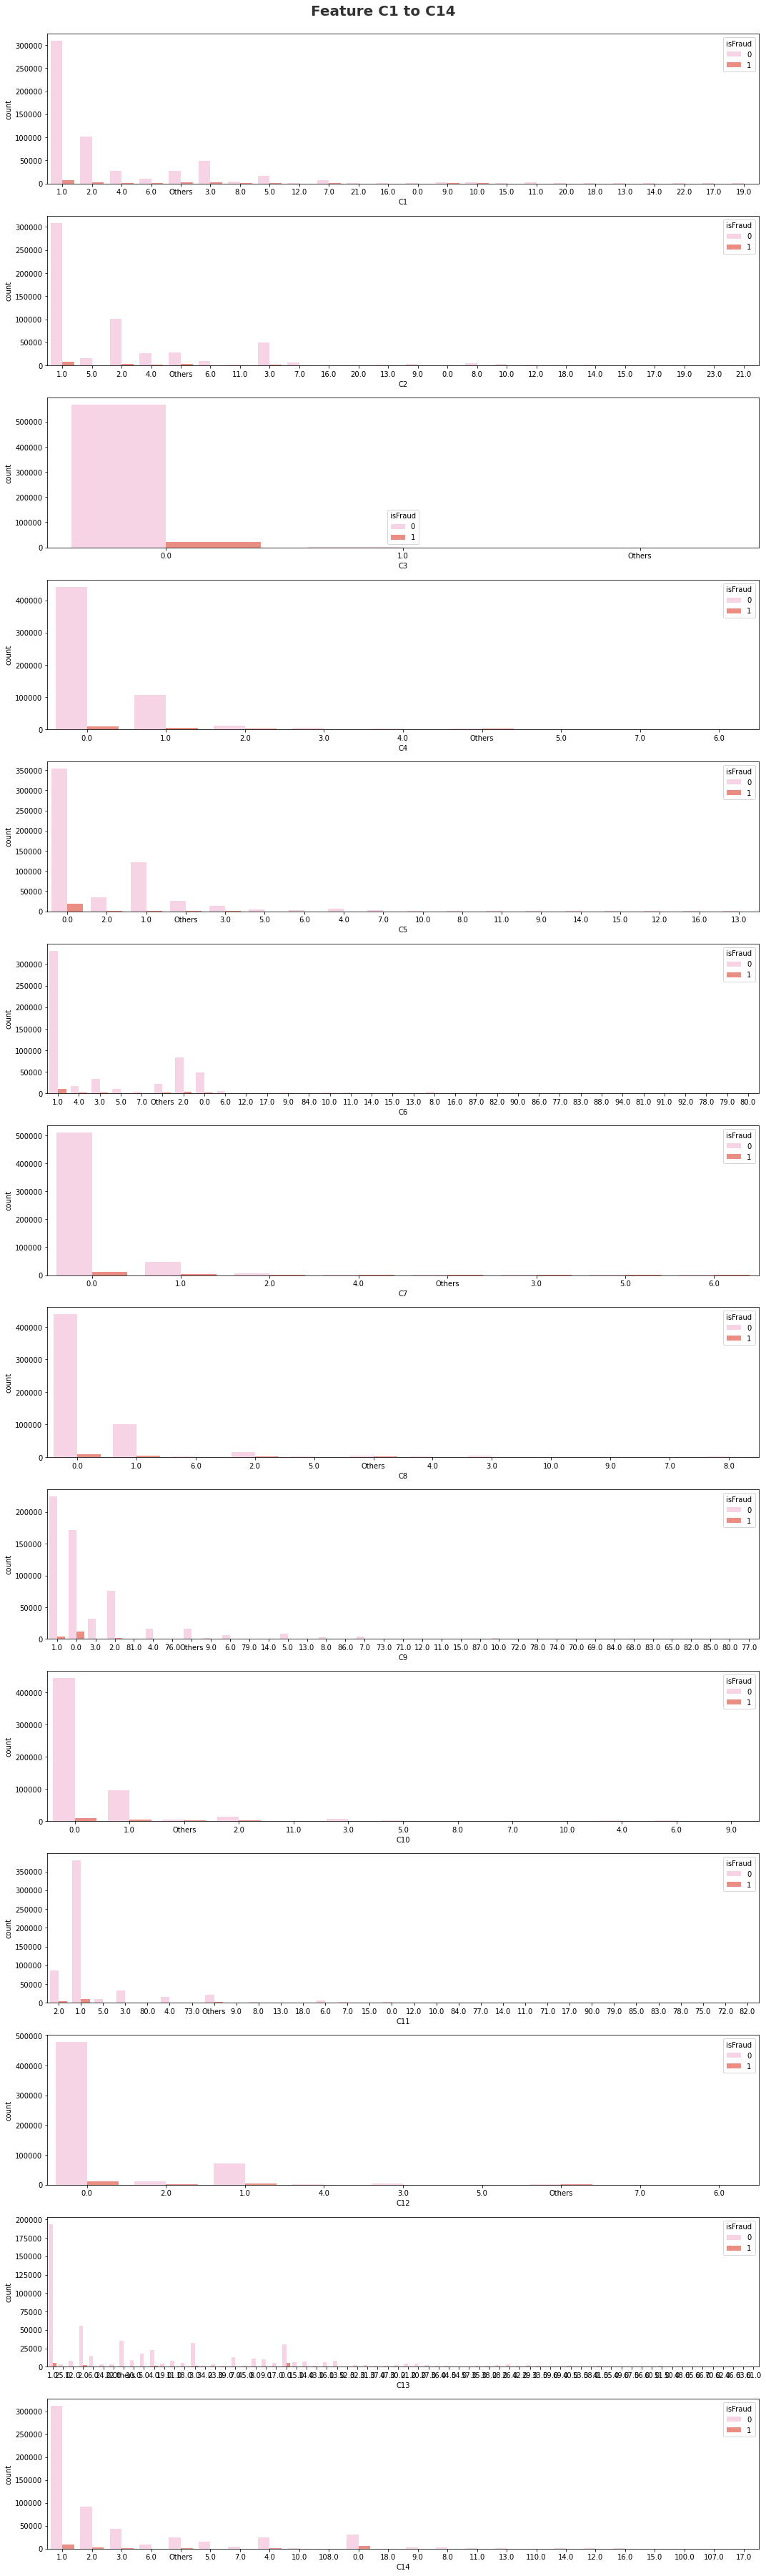

In [72]:
plt.figure(figsize=(15, 50))
plt.suptitle('Feature C1 to C14', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
col=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
for i in range(0, len(col)):
    plt.subplot(14, 1, i+1)
    sns.countplot(x=df[col[i]], data=df,palette = "Set3_r",hue='isFraud')
    #sns.countplot(x=df[col[i]])
    plt.xlabel(col[i])
    plt.tight_layout()
    
 

# feature D1 to D15

The 'D' column represents time deltas between transactions. These deltas are measured in days. The 'D' values are not exact timestamps, but represent the difference between the current transaction time and the timestamp of the previous transaction for the same card.

In [73]:
table(df)['D1':'D15'].T

Dataset Shape: (590540, 434)


feature_name,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Missing,1269,280797,262878,168922,309841,517353,551623,515614,515614,76022,279287,525823,528588,528353,89113
Missing %,0.214888,47.549192,44.514851,28.604667,52.467403,87.606767,93.40993,87.31229,87.31229,12.873302,47.293494,89.041047,89.509263,89.469469,15.090087
Uniques,641,641,649,808,688,829,597,12353,24,818,676,635,577,802,859


# TransactionDT

TransactionDT is a feature in the dataset that represents the elapsed time in seconds from a reference time to the time when each transaction occurred. The reference time is the time of the first transaction in the dataset.

It is a continuous variable that represents the timestamp of each transaction. Since the timestamp is in seconds, it provides a high resolution of the time at which a transaction occurred. This can help in detecting time-based patterns in the data, such as fraudulent activities happening at specific times or time intervals.

In [74]:
df['TransactionDT'].head()

0    86400
1    86401
2    86469
3    86499
4    86506
Name: TransactionDT, dtype: int64

### every row of TransactionDT refer to a particular time
 - 86400    00:00:00
 - 86401     00:00:01      

In [75]:
table(df)[2:3]

Dataset Shape: (590540, 434)


,dtypes,Missing,Missing %,Uniques
feature_name,,,,
TransactionDT,int64,0,0.0,573349


In [76]:
import datetime

start_date = datetime.datetime.strptime('2023-04-03', '%Y-%m-%d')
df['TransactionDT'] = df['TransactionDT'].apply(lambda x: (start_date + datetime.timedelta(seconds = x)))


#This code is converting the TransactionDT column in the dataframe df from a numerical format (measured in seconds) to a datetime format.


#### **timedelta** is a class in the datetime module of Python that represents a duration or difference between two dates or times. 
#### It can be used to perform arithmetic with datetime objects, such as adding or subtracting days, hours, minutes, or seconds to/from a datetime object.


#### **strptime()** is a method in Python's datetime module that can be used to parse a string representing a date and time into a datetime object. 
#### It takes two arguments: the string representing the date and time, and a format string specifying the expected format of the date and time string.

In [78]:
df['TransactionDT'].head(10)

0   2023-04-04 00:00:00
1   2023-04-04 00:00:01
2   2023-04-04 00:01:09
3   2023-04-04 00:01:39
4   2023-04-04 00:01:46
5   2023-04-04 00:01:50
6   2023-04-04 00:02:02
7   2023-04-04 00:02:09
8   2023-04-04 00:02:15
9   2023-04-04 00:02:16
Name: TransactionDT, dtype: datetime64[ns]

In [79]:
# this code convert the total seconds given in Transactiondt into the format of year/month/day - hour/minute/second

In [80]:
df['year']= df['TransactionDT'].dt.year
df['month']= df['TransactionDT'].dt.month
df['day']= df['TransactionDT'].dt.day
df['week_of_year'] = df['TransactionDT'].dt.week
df['day_of_week'] = df['TransactionDT'].dt.dayofweek
df['hour']= df['TransactionDT'].dt.hour


#### creating new column for year,month,day,hour,week_of_year
     - these newly created column will help in more clear understanding of time related fraud transaction

In [81]:
df.groupby(['hour','isFraud'])['TransactionAmt'].sum().to_frame()



TransactionAmt
hour isFraud                
0    0           4493137.025
     1            167359.236
1    0           3665705.053
     1            139679.913
2    0           2853319.320
     1            122812.961
3    0           2124161.423
     1             93367.785
4    0           1444715.452
     1             83123.128
5    0            942023.613
     1             79136.279
6    0            584347.701
     1             50704.911
7    0            382259.426
     1             39466.933
8    0            286179.629
     1             38833.631
9    0            309808.853
     1             48447.958
10   0            449012.093
     1             31333.131
11   0            803129.171
     1             36448.500
12   0           1560662.828
     1             71550.655
13   0           2829572.203
     1             95949.681
14   0           4030716.539
     1            107885.634
15   0           4941462.622
     1            149765.444
16   0           5458850.698
     1            172839.597
17   0           5946534.752
     1            204370.687
18   0           5926903.419
     1            218452.894
19   0           5821200.605
     1            228388.500
20   0           5796370.490
     1            243566.698
21   0           5640513.857
     1            227372.794
22   0           5377131.792
     1            220618.302
23   0           4987385.311
     1            212369.608

### It shows that at what hour , how much transcation is fraud and not fraud 

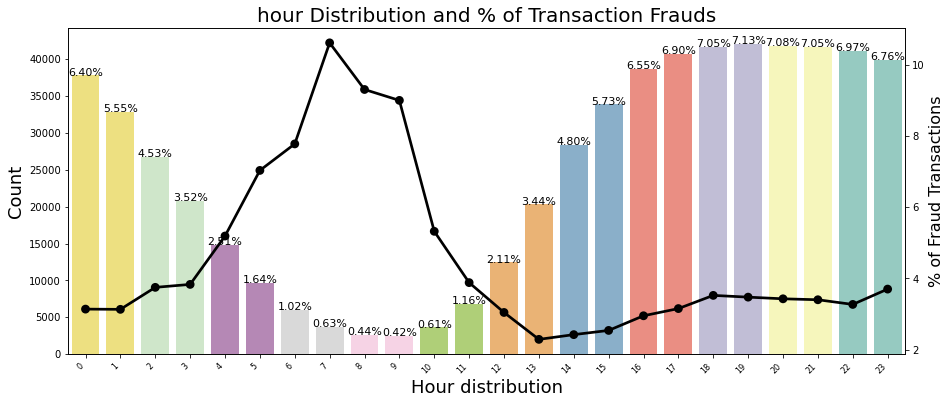

In [82]:
tmp = (pd.crosstab(df['hour'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='hour', data=df, order=list(tmp['hour'].values), palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='hour', y='Fraud', data=tmp,color='black', order=list(tmp['hour'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("hour Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("Hour distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    

### 10% of transactions are fraudulent at certain times of day! Notably,
### the high fraction of fraudulent transactions occur when there is a low number of transactions per hour 

In [84]:
df.sample(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,year,month,day,week_of_year,day_of_week,hour
276713,3263713,0,2023-06-19 20:45:10,29.002,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,631.0,microsoft,microsoft,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,0.833333,0.833333,0.0,NaN,2.0,0.0,0.0,2.0,Missing,Missing,Missing,M2,Missing,Missing,Missing,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,0.0,0.0,0.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0042,58.0042,58.0042,0.0,0.0,0.0,2.0,3.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,58.0042,87.006302,87.006302,0.0,29.0021,0.0,29.0021,29.0021,29.0021,29.0021,58.0042,58.0042,58.0042,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,384821.0,0.0,0.0,-2.0,-11.0,NaN,NaN,0.0,0.0,1

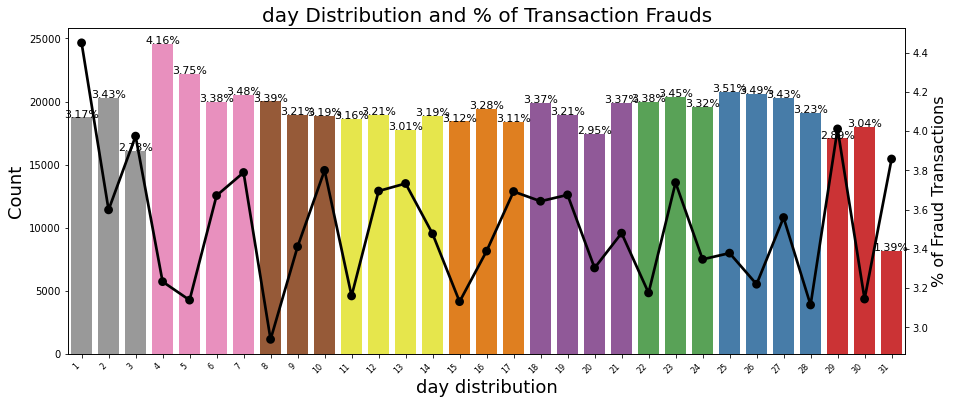

In [85]:
tmp = (pd.crosstab(df['day'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='day', data=df, order=list(tmp['day'].values), palette = "Set1_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='day', y='Fraud', data=tmp,color='black', order=list(tmp['day'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("day Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("day distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11)

# most percentage of fraud occur in the starting days of month and at the end days of month

In [87]:
(df.groupby(['isFraud','day'])['TransactionAmt'].sum()/df.groupby(['day'])['TransactionAmt'].sum() * 100).unstack('isFraud')

isFraud,0,1
day,,
1,95.224253,4.775747
2,96.031043,3.968957
3,95.856037,4.143963
4,96.867018,3.132982
5,96.282266,3.717734
6,95.645606,4.354394
7,95.751652,4.248348
8,96.758871,3.241129
9,96.792607,3.207393


# feature V1 to V339

In [88]:
table(df)['V1':'V339'].T

Dataset Shape: (590540, 440)


feature_name,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

In [89]:
# in these V1 to V339  there are large amount missing value

# in some column these are 2-10 unique value but in some of the column there are more no. of unique value

# feature id

In [90]:
df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,year,month,day,week_of_year,day_of_week,hour
0,2987000,0,2023-04-04 00:00:00,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,Noinf,Noinf,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,Missing,Missing,Missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,4,4,14,1,0
1,2987001,0,2023-04-04 00:00:01,29.0,

In [91]:
table(df)['id_01':'id_38'].T

Dataset Shape: (590540, 440)


feature_name,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object,object,object,object,object,float64,object,object,object,object,object,object
Missing,446307,449668,524216,524216,453675,453675,585385,585385,515614,515614,449562,446307,463220,510496,449555,461200,451171,545427,451222,451279,585381,585371,585371,585793,585408,585377,585371,449562,449562,512975,450258,512954,517251,512735,449555,449555,449555,449555
Missing %,75.576083,76.145223,88.768923,88.768923,76.823755,76.823755,99.12707,99.12707,87.31229,87.31229,76.127273,75.576083,78.440072,86.445626,76.126088,78.098012,76.399736,92.360721,76.408372,76.418024,99.126393,99.124699,99.124699,99.196159,99.130965,99.125715,99.124699,76.127273,76.127273,86.865411,76.245132,86.861855,87.589494,86.824771,76.126088,76.126088,76.126088,76.126088
Uniques,77,115655,24,15,93,101,84,94,46,62,365,2,54,25,3,2,104,18,522,394,490,25,3,12,341,95,2,2,2,75,130,4,260,4,2,2,2,2


In [92]:
# large no. of missing value

# object type  : 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 
                    #'id_34', 'id_35', 'id_36', 'id_37', 'id_38',

In [93]:
# only categorical feature of id column

df[['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 
    'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']].describe(include='all')

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985
unique,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922


In [94]:
# In 'id' categorical column, there are 2,3,4 unique values in most of the column

# but in column  id_30, id_31 ,id_33  -  has more no. of unique value

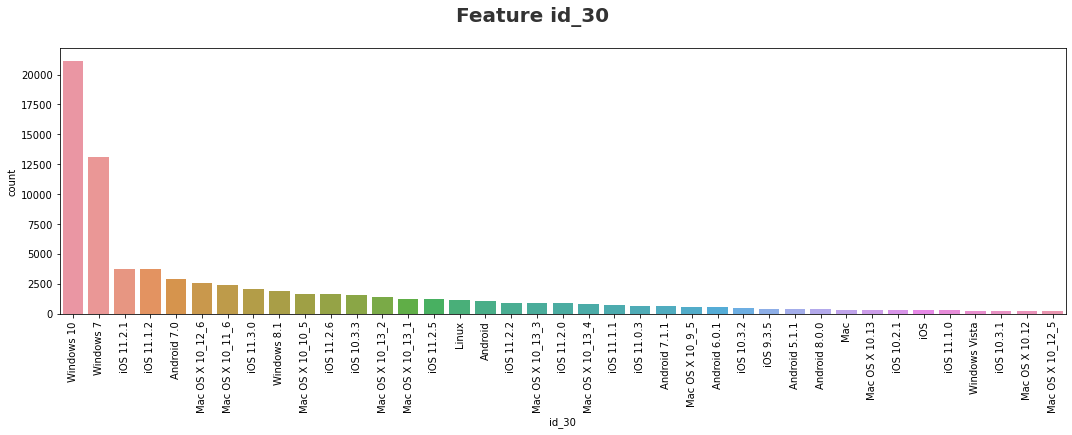

In [95]:
plt.figure(figsize=(15, 6))
plt.suptitle('Feature id_30 ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
feature_count = df['id_30'].value_counts(dropna=False)[:40].reset_index().rename(columns={'index': 'id_30', 'id_30': 'count'})
sns.barplot(x='id_30', y='count', data=feature_count)
plt.xticks(rotation = 'vertical')
plt.xlabel('id_30')
plt.tight_layout()

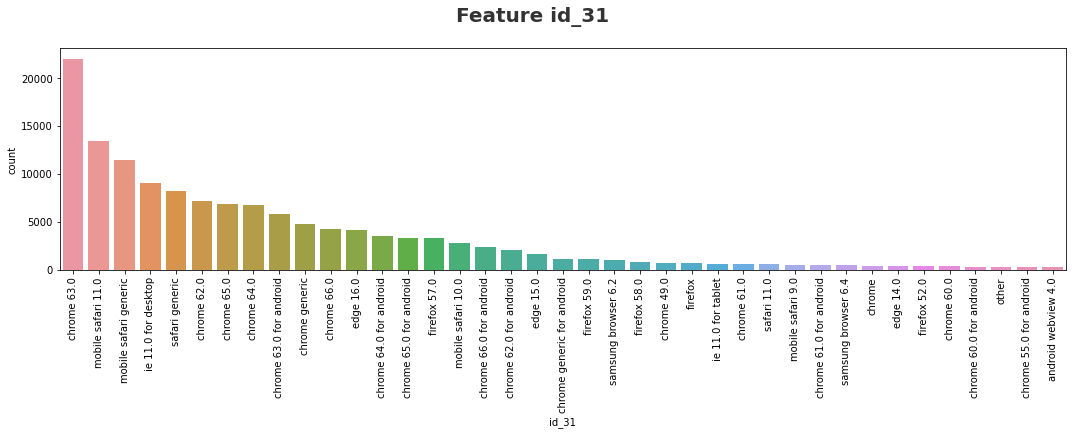

In [96]:
plt.figure(figsize=(15, 6))
plt.suptitle('Feature id_31 ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
feature_count = df['id_31'].value_counts(dropna=False)[:40].reset_index().rename(columns={'index': 'id_31', 'id_31': 'count'})
sns.barplot(x='id_31', y='count', data=feature_count)
plt.xticks(rotation = 'vertical')
plt.xlabel('id_31')
plt.tight_layout()

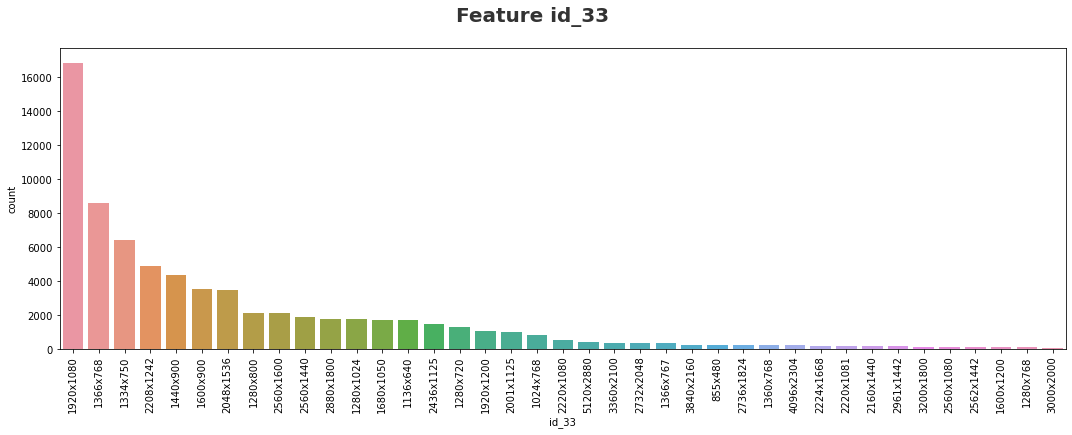

In [97]:
plt.figure(figsize=(15, 6))
plt.suptitle('Feature id_33 ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
feature_count = df['id_33'].value_counts(dropna=False)[:40].reset_index().rename(columns={'index': 'id_33', 'id_33': 'count'})
sns.barplot(x='id_33', y='count', data=feature_count)
plt.xticks(rotation = 'vertical')
plt.xlabel('id_33')
plt.tight_layout()

In [98]:
df['id_31'].unique()

array([nan, 'samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [99]:
df.loc[df['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
df.loc[df['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
df.loc[df['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
df.loc[df['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
df.loc[df['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
df.loc[df['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
df.loc[df['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
df['id_31'].fillna("NAN", inplace=True)
df.loc[df.id_31.isin(df.id_31.value_counts()[df.id_31.value_counts() <= 200 ].index), 'id_31'] = "Others"

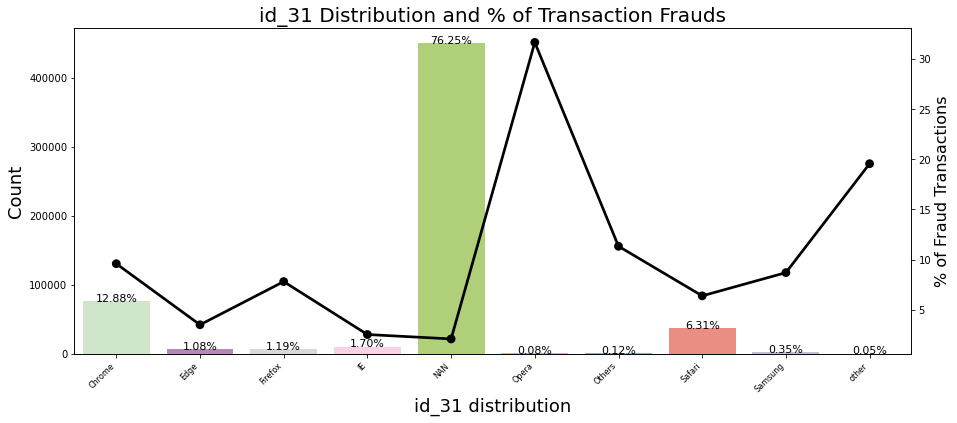

In [100]:
tmp = (pd.crosstab(df['id_31'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='id_31', data=df, order=list(tmp['id_31'].values), palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='id_31', y='Fraud', data=tmp,color='black', order=list(tmp['id_31'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("id_31 Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("id_31 distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    

#### the feature id_30 refers to the type of operating system or browser used by the cardholder for the transaction. 

In [101]:
df['id_30'].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [102]:
df.loc[df['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android '
df.loc[df['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df.loc[df['id_30'].str.contains('Mac', na=False), 'id_30'] = 'Mac'
df.loc[df['id_30'].str.contains('Windows ', na=False), 'id_30'] = 'Windows'

df['id_30'].fillna("NAN", inplace=True)

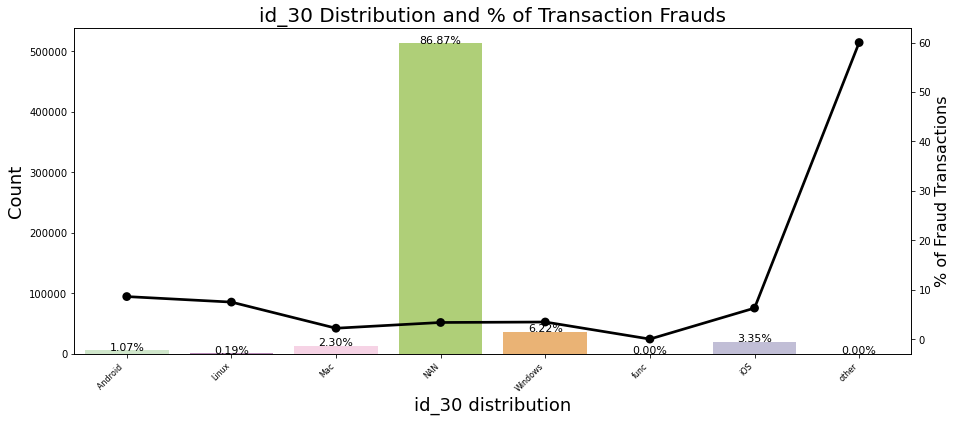

In [103]:
tmp = (pd.crosstab(df['id_30'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)




plt.figure(figsize=(15, 6))
g = sns.countplot(x='id_30', data=df, order=list(tmp['id_30'].values), palette = "Set3_r")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels
gg = g.twinx()
gg = sns.pointplot(x='id_30', y='Fraud', data=tmp,color='black', order=list(tmp['id_30'].values))
gg.set_ylabel("% of Fraud Transactions", fontsize=16)
g.set_title("id_30 Distribution and % of Transaction Frauds", fontsize=20)
g.set_xlabel("id_30 distribution", fontsize=18)
g.set_ylabel("Count", fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    

In [104]:
#'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 
 #   'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'

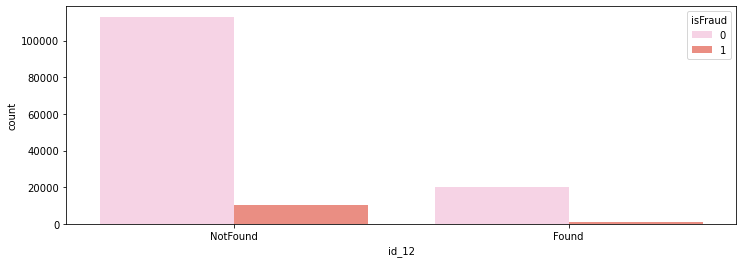

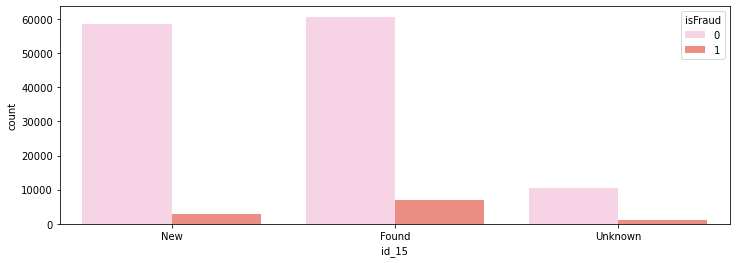

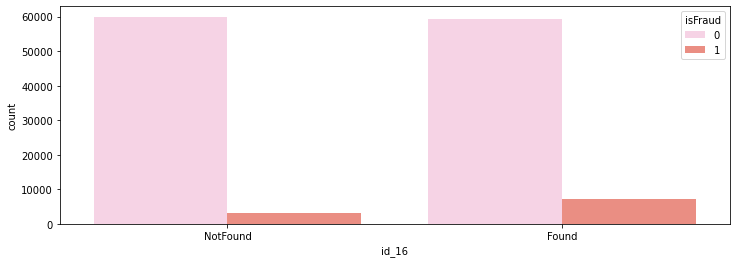

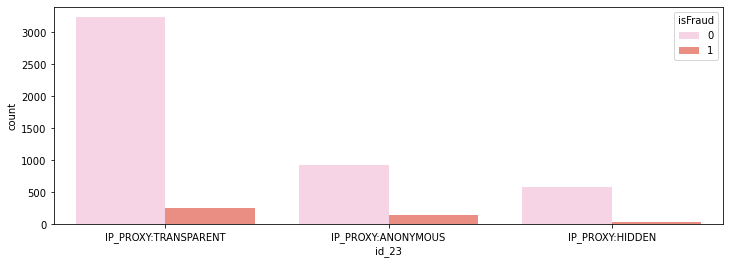

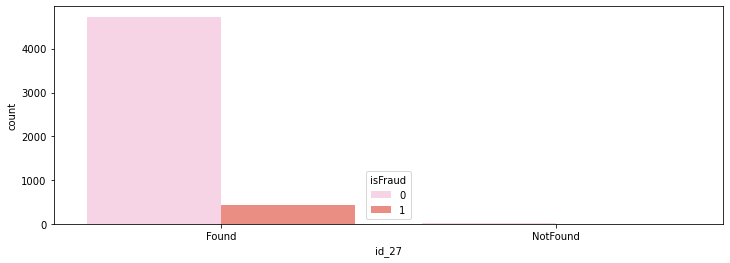

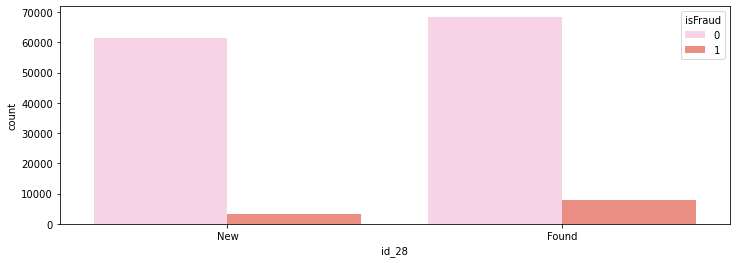

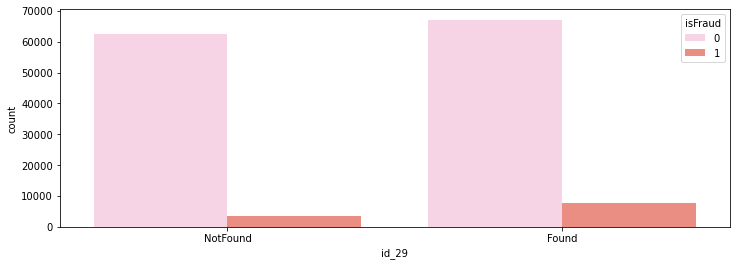

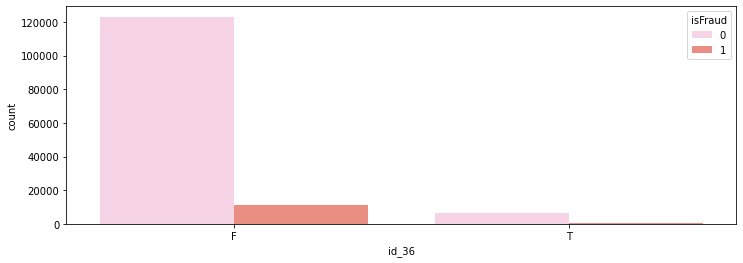

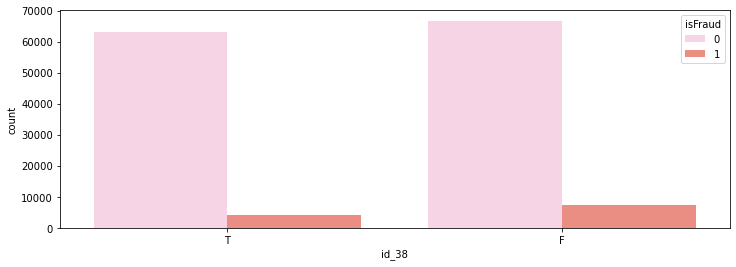

In [105]:
tmp = (pd.crosstab(df['id_30'], df['isFraud'], normalize='index') * 100).reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_36', 'id_38']:
    fig, ax = plt.subplots(nrows=1, figsize=(12,4))
    sns.countplot(x=col, data=df,palette = "Set3_r",hue='isFraud')

   
    plt.show()

# main finding
 - Data is highly imbalanced
 - large no. of missing value in dataset
 - outliers present     
 - transactiondt plays vital role
 - most of the fraud transaction occur at that time and hour in which user are inactive , means very less no. of transaction is taking place
 - most fraud transaction is taking place from mastercard credit card and visa credit card
 - some places (which are given in from of numbers) are hot spot of fraud transaction
 - most of the p_emaildomain is gmail.com or gamil
 - the feature id_30 refers to the type of operating system or browser used by the cardholder for the transaction. most of the user are using windows
 - most of the user are using chrome as web browser
 - 75 percentile  of column from C1 to C14  is 2,3,0  but the max value in very column is very high it indicate that there are large no. of outliers
 - In card5 the most frequent values are 226, 224, 166 that represents 73% of data. Also is posible to see high % of frauds in 137, 147, 141 that has few entries for values.

# Feature engineering

<div class="alert alert-success">***********************Feature engineering ************************</div>